<a href="https://colab.research.google.com/github/Deepak-Data-Scientist-IIT/Emergency-vs-Non-Emergency-Vehicle-Classification/blob/master/Emergency_vs_non_Emergency_Vehicle_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading DataSet**

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip -uq "drive/My Drive/Dataset.zip"

In [4]:
# Reading the CSV File
data = pd.read_csv('Dataset/emergency_classification.csv')

In [5]:
# Create random number generator
seed = 42

rng = np.random.RandomState(seed)

In [6]:
# Looking the first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [7]:
# Distribution of classes in the dataset
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [8]:
# Load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
  # loading the image using its name
  img = plt.imread('Dataset/images/' + img_name)
  # saving each image in the list
  X.append(img)

# Converting the list of images into array
X = np.array(X)

# Storing the target variable in saperate variable
y = data.emergency_or_not.values

In [9]:
# shape of the image
X.shape, y.shape

((2352, 224, 224, 3), (2352,))

# **Pre-Processing the data**

In [10]:
# Since we are using CNN  We do not have to resize the image into 1D array

In [11]:
# Normalize the pixel values
X = X / X.max()

In [12]:
# minimum and maximum pixel value of images after normalize
X.min(), X.max()

(0.0, 1.0)

# **Creating tarining and validation set**

In [13]:
# Creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state= seed)

In [15]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

# **Defining the model architecture**

In [16]:
# Importing Convotional Layer and flatten layer from keras
from keras.layers import Conv2D, Flatten

In [17]:
# Defining the model Architecture

# Creating a Sequential model
model = Sequential()

# Defining input layer with 3D input of shape(224,224,3)
model.add(InputLayer(input_shape=(224,224,3)))

# Defining the First Convolutional layer with 25 filters of size (5,5)
model.add(Conv2D(25,(5,5), activation='relu', strides=(1,1), padding='valid'))

# Defining the First Convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50,(5,5), activation='relu', strides=(1,1), padding='valid'))

# Flattining the output from convolutional layer So that it can be forwarded to the dense layers
model.add(Flatten())

# Defining the first dense layer and fully connected layer with 100 neurons
model.add(Dense(units=100, activation='sigmoid'))

# Defining the output layer with 1 neuron since it is a binary classification problem
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
# printing summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten (Flatten)            (None, 2332800)           0         
_________________________________________________________________
dense (Dense)                (None, 100)               233280100 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


# **1.5  Understanding the Architecture**

* Input shape is (224,224,3) since images are of this shape
* We then applied 25 filters each of shape (5,5) and stride is (1,1)
* So the output from first convolutional layer is: (224-5+1,224-5+1,25) which is (220,220,25)
* We then applied 50 filters of shape (5,5) each with stride (1,1)
* Then the output is (220-5+1,220-5+1,50) which is (216,216,50)
* Then this output is flattened which resulted in 216 X 216 X 50 = 2332800 features
* Finally these features are passed through the fully connected layers.

# 1.6  **Understanding the number of parameters of different layers**

1 First Convolutional Layer
* Number of input channels = 3
* Number of filters = 25
* Filter Size = (5,5)
* Learnable parameters = 25 * 5 * 5 * 3 + 25 (1 bias for each filter) = 1900

2 Second Convolutional Layer
* Number of input channels = 25
* Number of filters = 50
* Filter Size = (5,5)
* Learnable parameters = 50 * 5 * 5 * 25 + 50 (1 bias for each filter) = 31300

3 First Fully Connected Layer
* Number of input features = 216 * 216 * 50 = 2332800
* Number of neurons in this hidden layer = 100
* Learnable parameters = 2332800 * 100 + 100 (1 bias for each neuron) = 233280100

4 Output Layer
* Number of input features = 100
* Number of neurons in this layer = 1
* Learnable parameters = 100 * 1 + 1 (1 bias for each neuron) = 101

# **Compiling the model**

In [19]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# **Training the Model**

In [20]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 9s 693ms/step - loss: 0.7109 - accuracy: 0.5680 - val_loss: 0.6631 - val_accuracy: 0.5708
Epoch 2/10
13/13 [==============================] - 6s 495ms/step - loss: 0.6383 - accuracy: 0.6373 - val_loss: 0.6242 - val_accuracy: 0.6431
Epoch 3/10
13/13 [==============================] - 7s 509ms/step - loss: 0.6217 - accuracy: 0.6592 - val_loss: 0.6061 - val_accuracy: 0.6686
Epoch 4/10
13/13 [==============================] - 7s 516ms/step - loss: 0.5949 - accuracy: 0.6829 - val_loss: 0.5970 - val_accuracy: 0.6771
Epoch 5/10
13/13 [==============================] - 7s 525ms/step - loss: 0.5900 - accuracy: 0.6926 - val_loss: 0.5867 - val_accuracy: 0.6742
Epoch 6/10
13/13 [==============================] - 7s 534ms/step - loss: 0.5761 - accuracy: 0.6914 - val_loss: 0.5805 - val_accuracy: 0.6856
Epoch 7/10
13/13 [==============================] - 7s 551ms/step - loss: 0.5814 - accuracy: 0.6902 - val_loss: 0.5749 - val_accuracy: 0.6898
Epoch 

#  **Evaluating model performance**

In [21]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, model.predict_classes(X_train)), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on training set: 0.7503037667071689 %


In [22]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)), '%')

Accuracy on validation set: 0.7025495750708215 %


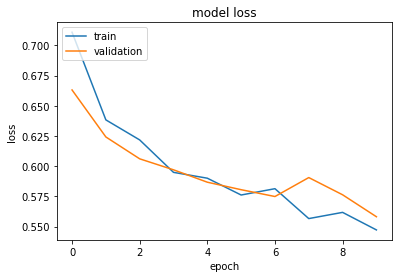

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

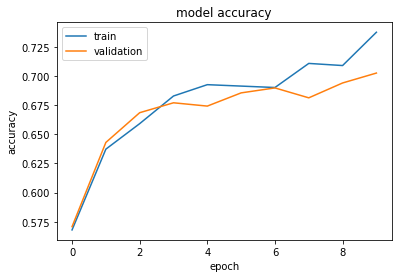

In [25]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()